In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from sklearn.linear_model import LinearRegression
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# import sys 
# sys.path.append
# from wave_solvers_v2 import num_step, ml_step, make_matrix, num_stencils
from train_ml import train_ml
from KS_solver import KS_step, ml_step

from jax_models import *

In [2]:
def f_rand(L):
    nwaves = 5
    a = np.arange(nwaves)+1
    b = np.random.rand(nwaves)
    d = np.random.rand(nwaves)

    xi = np.linspace(0,L,1000)
    fx = xi*0
    for i in range(nwaves):
        fx = fx + b[i]*np.sin(2*a[i]*np.pi*(xi-d[i])/L)
        
    mina = np.min(fx)
    maxa = np.max(fx)

    def f(x):
        fx = x*0
        for i in range(nwaves):
            fx = fx + b[i]*np.sin(2*a[i]*np.pi*(x-d[i])/L)
            
        fx = (fx - mina) / (maxa - mina)   
        return fx

    return f

# Train ML algorithm (autoregressive) for system

In [3]:
# define our KS domain and system
dt = 0.25
s = 128
l=22
M=16
KS = KuramotoSivashinsky(dt=dt, s=s, l=l, M=M)

In [4]:
rollout = 5
stencil_x = 3
stencil_t = 5
nx = KS.s
params = train_ml(KS, dt, nx, rollout, stencil_x, stencil_t, f_rand, print_mes=True, nb=5)

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


# Test our trained stencil

In [5]:
x = np.arange(0,l,l/s)
x_plot = np.linspace(0,l,s+1)
f = f_rand(l)
f0 = f(x)

(105, 128)
7
(5, 128)
128
(105, 128)


Text(0, 0.5, 'x')

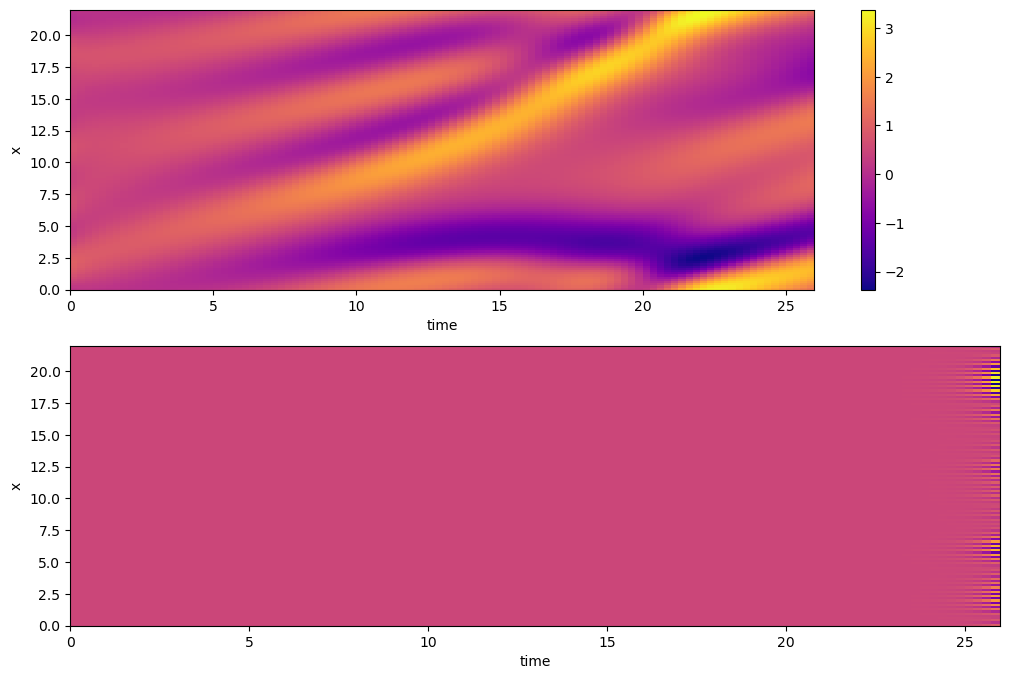

In [17]:
num_steps = 100
t = np.arange(0, KS.dt*(num_steps+stencil_t-0.1), KS.dt)

data_result = KS_step(KS, num_steps+stencil_t-1, f0)
print(data_result.shape)
y0 = data_result[:stencil_t]
print(len(params))
print(y0.shape)
ml_result = ml_step(y0, num_steps, params, stencil_x)

fig, ax = plt.subplots(2,1, figsize=(12,8))

cm = ax[0].pcolormesh(t, x_plot, data_result[:-1].T, cmap='plasma')
ax[0].set_xlabel('time')
ax[0].set_ylabel('x')
plt.colorbar(cm, ax=ax[0])

print(ml_result.shape)
ax[1].pcolormesh(t, x_plot, ml_result[:-1].T, cmap='plasma')
ax[1].set_xlabel('time')
ax[1].set_ylabel('x')
plt.colorbar(cm, ax=ax[1])

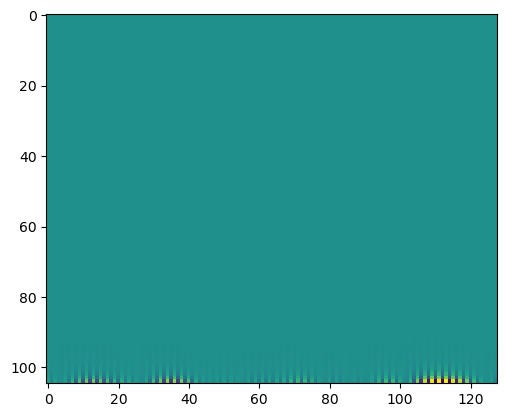

In [18]:
plt.imshow(ml_result)

# Look at individual point
Sicne it is being trained in an autoregressive manner anyway

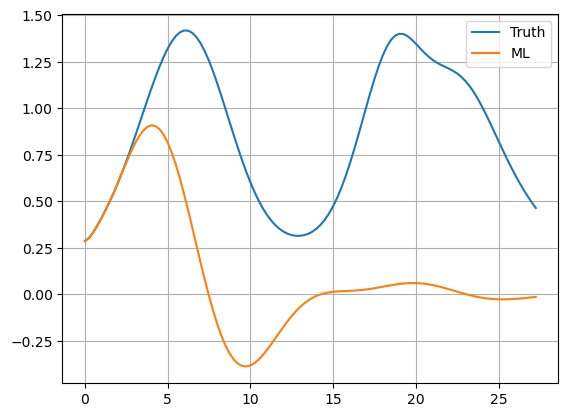

In [56]:
i = 30
data_resulti = data_result[:,i]
ml_resulti = ml_result[:,i]

plt.plot(t, data_resulti, label='Truth')
plt.plot(t, ml_resulti, label='ML')
plt.legend()
plt.grid()

In [28]:
y0.shape

(2, 102)